In [151]:
import pathlib 
import os
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import umap
import matplotlib.pyplot as plt

In [112]:
folder_to_metadata = "/net/data.isilon/ag-cherrmann/nschmidt/project/parse_xml_for_VAE/metadata_20250110"

In [113]:
def combine_dfs(paths: list):
    # Combines any number of csv files to a single pandas DataFrame, keeping only shared column indices. 
    for i in range(1,len(paths)):
        if i == 1: 
            joined_df = pd.read_csv(paths[i-1], header=[0], index_col=0)
            next_df = pd.read_csv(paths[i], header=[0], index_col=0)
            joined_df = pd.concat([joined_df, next_df], join="inner")  # Parameter "inner" keeps only the shared column indices.
        else:
            next_df = pd.read_csv(paths[i], header=[0], index_col=0)
            joined_df = pd.concat([joined_df, next_df], join="inner")
    return joined_df

In [118]:
path_to_metadata = f"{folder_to_metadata}/full_data_train_valid_test.csv"

In [166]:
metadata_df = pd.read_csv(path_to_metadata)
metadata_df = metadata_df.drop(columns=['Unnamed: 0'])
metadata_df = metadata_df[["Filename", "Dataset", "Diagnosis" , "Age", "Sex", "Usage_original", "Sex_int"]]

In [120]:
total_fig = make_subplots(rows=4, cols=1, subplot_titles=["HC", "MDD", "SCHZ", "CTT"])
total_fig.update_layout(height=800)

conditions = ["HC", "MDD", "SCHZ", "CTT"]

for idx, cond in enumerate(conditions):
    fig = px.histogram(data_frame=metadata_df[(metadata_df["Diagnosis"] == cond) & ~(metadata_df["Dataset"]=="NU")], 
                       x="Age", 
                       title=cond,
                       )
    total_fig.add_trace(fig.data[0], row=idx+1, col=1)
    total_fig.update_yaxes(range=[0.0, 300.0], row=idx+1, col=1)
    total_fig.update_xaxes(range=[0.0, 90.0], row=idx+1, col=1)

total_fig.show()

In [121]:
# Validation that only the NU dataset doesn't contain age information. 
metadata_df[(metadata_df["Age"]==0) & ~(metadata_df["Dataset"]=="NU")] 

,Unnamed: 0,Filename,Dataset,Diagnosis,Age,Sex,Usage_original,Sex_int


In [122]:
total_fig_sexes = make_subplots(rows=1, cols=4, subplot_titles=["HC", "MDD", "SCHZ", "CTT"])
total_fig_sexes.update_layout(width=800)

conditions = ["HC", "MDD", "SCHZ", "CTT"]

for idx, cond in enumerate(conditions):
    df_cond = metadata_df[metadata_df["Diagnosis"] == cond]

    sex_counts = df_cond.groupby("Sex").size().reset_index(name='Count')

    fig = px.bar(data_frame=sex_counts, 
                       x="Sex",
                       y="Count", 
                       title=cond,
                       )
                    
    total_fig_sexes.add_trace(fig.data[0], row=1, col=idx+1)
    # total_fig_sexes.update_yaxes(range=[0.0, 300.0], row=1, col=idx+1)
    # total_fig_sexes.update_xaxes(range=[0.0, 90.0], row=1, col=idx+1)

total_fig_sexes.show()

In [123]:
shuffle_df = metadata_df.copy()
shuffle_df = shuffle_df.sample(frac=1)
corr_fig = px.scatter(x=shuffle_df["Age"], color=shuffle_df["Diagnosis"])
corr_fig.show()

In [168]:
filter_df = metadata_df.loc[metadata_df["Dataset"] != "NU"]
print(filter_df)
categories = sorted(filter_df["Diagnosis"].unique())

fig = go.Figure()

for category in categories:
    category_data = filter_df[filter_df["Diagnosis"] == category]["Age"]
    fig.add_trace(go.Box(
        y=category_data,
        name=category,
        marker_color=px.colors.qualitative.Plotly[categories.index(category) % len(px.colors.qualitative.Plotly)]
    ))

fig.update_layout(
    autosize=True,
    yaxis=dict(range=[0, 90], title="Age"),
    xaxis=dict(title="Diagnosis"),
    boxmode='group',
    boxgap=0,
    boxgroupgap=0
)

fig.show()

                   Filename Dataset Diagnosis   Age     Sex Usage_original  \
0        IXI426-IOP-1011-T1     IXI        HC  41.2  Female       training   
1        IXI571-IOP-1154-T1     IXI        HC  56.6  Female       training   
2       IXI170-Guys-0843-T1     IXI        HC  50.2  Female       training   
3       IXI054-Guys-0707-T1     IXI        HC  60.8  Female       training   
4       IXI196-Guys-0805-T1     IXI        HC  47.8  Female       training   
...                     ...     ...       ...   ...     ...            ...   
2887  sub-NSS126_ses-01_T1w     NSS      SCHZ  37.0  Female        testing   
2888  sub-NSS127_ses-01_T1w     NSS      SCHZ  28.0  Female        testing   
2889  sub-NSS128_ses-01_T1w     NSS      SCHZ  44.0    Male        testing   
2890  sub-NSS129_ses-01_T1w     NSS       CTT  41.0  Female        testing   
2891  sub-NSS130_ses-01_T1w     NSS      SCHZ  39.0  Female        testing   

      Sex_int  
0           0  
1           0  
2           0  

In [125]:
testing = metadata_df[(metadata_df["Dataset"] == "whiteCAT") | (metadata_df["Dataset"] == "NSS")]
testing_NSS = testing[testing["Dataset"] == "NSS"]

In [126]:
md_df = pd.read_csv(f"{folder_to_metadata}/full_data_train_valid_test.csv", header = [0])
md_df.drop(columns=["Unnamed: 0"])

,Filename,Dataset,Diagnosis,Age,Sex,Usage_original,Sex_int
0,IXI426-IOP-1011-T1,IXI,HC,41.2,Female,training,0
1,IXI571-IOP-1154-T1,IXI,HC,56.6,Female,training,0
2,IXI170-Guys-0843-T1,IXI,HC,50.2,Female,training,0
3,IXI054-Guys-0707-T1,IXI,HC,60.8,Female,training,0
4,IXI196-Guys-0805-T1,IXI,HC,47.8,Female,training,0
...,...,...,...,...,...,...,...
2887,sub-NSS126_ses-01_T1w,NSS,SCHZ,37.0,Female,testing,0
2888,sub-NSS127_ses-01_T1w,NSS,SCHZ,28.0,Female,testing,0
2889,sub-NSS128_ses-01_T1w,NSS,SCHZ,44.0,Male,testing,1
2890,sub-NSS129_ses-01_T1w,NSS,CTT,41.0,Female,testing,0


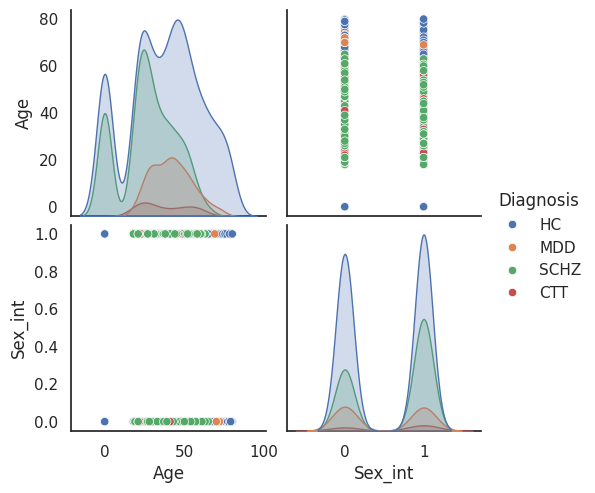

In [135]:
selected_df = md_df.copy()[["Diagnosis", "Age", "Sex_int"]]

label_encoder = LabelEncoder()

def convert_to_num(df, cols):
    for i in cols:
        df[i] = label_encoder.fit_transform(df[i])
    return df

num_mddf = convert_to_num(selected_df.copy(), ["Diagnosis"])
num_mddf.head()

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
sns.pairplot(selected_df.copy(), hue='Diagnosis')

/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/umap/spectral.py:548: UserWarning:

Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!



(2892, 2)


Text(0.5, 1.0, 'UMAP projection of the metadata')

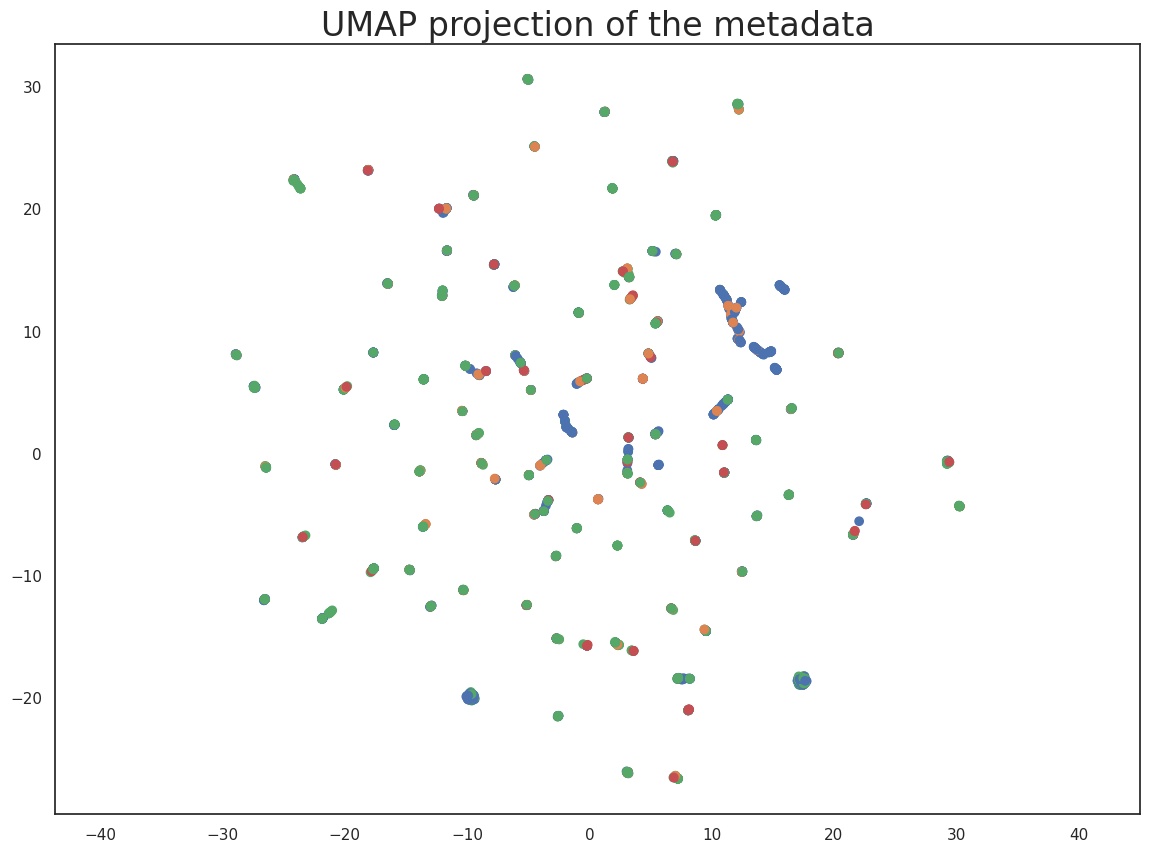

In [146]:
reducer = umap.UMAP()
nan_df = selected_df.copy().dropna()[["Age", "Sex_int"]].values
embedding = reducer.fit_transform(nan_df)
print(embedding.shape)
plt.scatter(
    embedding[:,0],
    embedding[:,1],
    c=[sns.color_palette()[int(x)] for x in selected_df.Diagnosis.map({"HC":0, "MDD":1, "SCHZ":2, "CTT":3})]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the metadata', fontsize=24)